Hamza Nashaat (221100328) Spotify

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

rating_matrix = pd.read_csv('/content/rating_matrix_rounded_1_to_5 (new).csv')

target_items = ["Imagine", "Industry Baby"]

mean_ratings = rating_matrix[target_items].mean()
print(mean_ratings)

Imagine          3.875000
Industry Baby    3.142857
dtype: float64


In [ ]:
rating_matrix_filled = rating_matrix.copy()
for item in target_items:
    rating_matrix_filled[item].fillna(mean_ratings[item], inplace=True)

print(rating_matrix_filled[target_items])

   Imagine  Industry Baby
0    4.000       3.000000
1    5.000       3.142857
2    2.000       3.000000
3    3.875       5.000000
4    3.875       2.000000
5    5.000       3.142857
6    4.000       3.000000
7    3.000       2.000000
8    5.000       4.000000
9    3.000       3.142857


<ipython-input-40-00625f628f2a>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  rating_matrix_filled[item].fillna(mean_ratings[item], inplace=True)


In [ ]:
average_ratings_all = rating_matrix_filled.iloc[:, 1:].mean()

print(average_ratings_all)

Bad Guy                3.222222
Billie Jean            3.200000
Blinding Lights        2.666667
Bohemian Rhapsody      3.111111
Circles                3.444444
Closer                 2.600000
Dancing Queen          2.666667
HUMBLE.                2.666667
Heat Waves             3.000000
Hey Jude               3.600000
Imagine                3.875000
Industry Baby          3.142857
Levitating             3.000000
Lovely                 3.777778
Lucid Dreams           3.888889
MONTERO                2.800000
Midnight City          3.375000
Old Town Road          2.777778
Peaches                3.400000
Rolling in the Deep    3.000000
SICKO MODE             3.000000
Shape of You           3.300000
Somebody Else          2.800000
Stay                   3.100000
Sunflower              3.375000
Take on Me             2.444444
Uptown Funk            3.100000
Watermelon Sugar       3.100000
drivers license        3.125000
good 4 u               3.400000
dtype: float64


In [ ]:
rating_differences = rating_matrix_filled.iloc[:, 1:] - average_ratings_all

print(rating_differences[target_items])


   Imagine  Industry Baby
0    0.125      -0.142857
1    1.125       0.000000
2   -1.875      -0.142857
3    0.000       1.857143
4    0.000      -1.142857
5    1.125       0.000000
6    0.125      -0.142857
7   -0.875      -1.142857
8    1.125       0.857143
9   -0.875       0.000000


Text(0.5, 1.0, 'Covariance Matrix Heatmap')

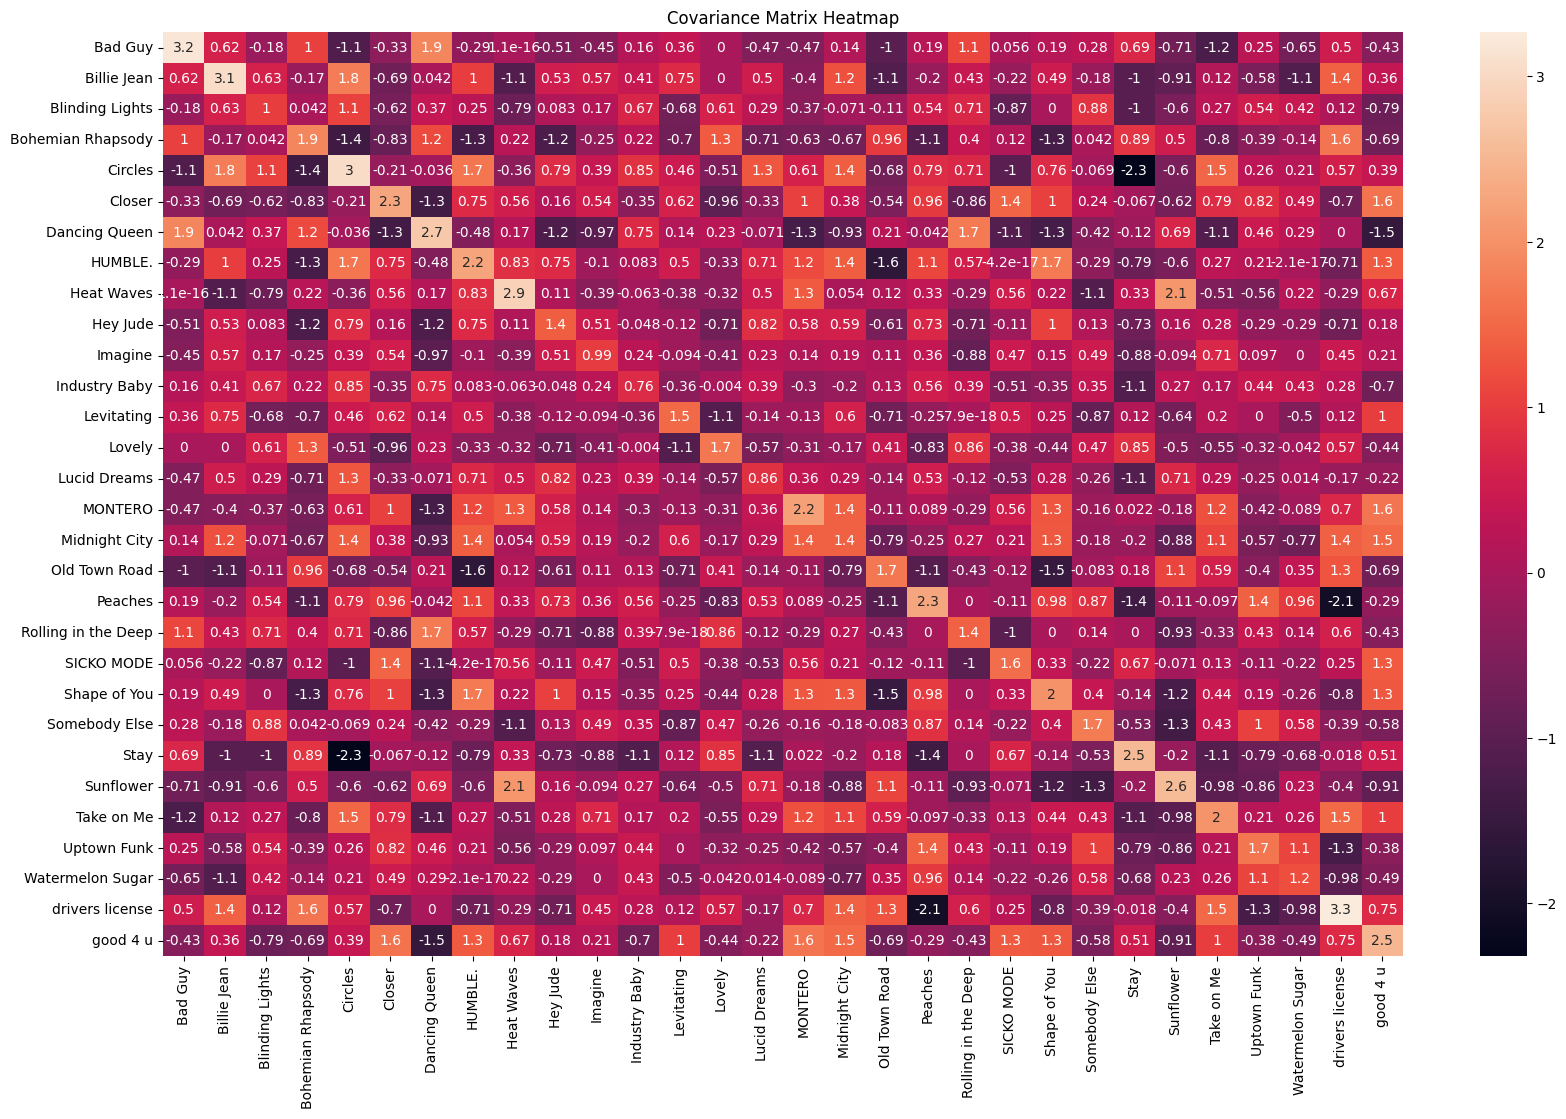

In [ ]:
covariance_matrix = rating_differences.cov()

covariance_matrix_filled = covariance_matrix.fillna(0)
plt.figure(figsize=(20, 12))
sns.heatmap(covariance_matrix_filled, annot=True)
plt.title('Covariance Matrix Heatmap')

In [ ]:
top_5_peers = {}
top_10_peers = {}
for item in target_items:
    sorted_covariances = covariance_matrix_filled[item].sort_values(ascending=False)
    top_5_peers[item] = sorted_covariances.index[1:6].tolist()
    top_10_peers[item] = sorted_covariances.index[1:11].tolist()

print(top_5_peers)
print(top_10_peers)

{'Imagine': ['Take on Me', 'Billie Jean', 'Closer', 'Hey Jude', 'Somebody Else'], 'Industry Baby': ['Industry Baby', 'Dancing Queen', 'Blinding Lights', 'Peaches', 'Uptown Funk']}
{'Imagine': ['Take on Me', 'Billie Jean', 'Closer', 'Hey Jude', 'Somebody Else', 'SICKO MODE', 'drivers license', 'Circles', 'Peaches', 'Industry Baby'], 'Industry Baby': ['Industry Baby', 'Dancing Queen', 'Blinding Lights', 'Peaches', 'Uptown Funk', 'Watermelon Sugar', 'Billie Jean', 'Lucid Dreams', 'Rolling in the Deep', 'Somebody Else']}


In [ ]:
reduced_space_top_5 = rating_matrix_filled[top_5_peers["Imagine"] + top_5_peers["Industry Baby"]]

predictions_top_5 = reduced_space_top_5.mean(axis=1)

print(reduced_space_top_5)
print(predictions_top_5)

   Take on Me  Billie Jean  Closer  Hey Jude  Somebody Else  Industry Baby  \
0         5.0            1       5         4              4       3.000000   
1         3.0            2       4         3              4       3.142857   
2         1.0            1       2         1              1       3.000000   
3         2.0            5       1         3              5       5.000000   
4         1.0            2       2         4              4       2.000000   
5         2.0            5       5         4              2       3.142857   
6         NaN            5       2         5              2       3.000000   
7         3.0            5       2         3              2       2.000000   
8         4.0            4       1         4              2       4.000000   
9         1.0            2       2         5              2       3.142857   

   Dancing Queen  Blinding Lights  Peaches  Uptown Funk  
0            1.0              3.0        5            5  
1            2.0         

In [ ]:
reduced_space_top_10 = rating_matrix_filled[top_10_peers["Imagine"] + top_10_peers["Industry Baby"]]
predictions_top_10 = reduced_space_top_10.mean(axis=1)

print(reduced_space_top_10)
print(predictions_top_10)

   Take on Me  Billie Jean  Closer  Hey Jude  Somebody Else  SICKO MODE  \
0         5.0            1       5         4              4           3   
1         3.0            2       4         3              4           5   
2         1.0            1       2         1              1           3   
3         2.0            5       1         3              5           1   
4         1.0            2       2         4              4           3   
5         2.0            5       5         4              2           5   
6         NaN            5       2         5              2           3   
7         3.0            5       2         3              2           3   
8         4.0            4       1         4              2           2   
9         1.0            2       2         5              2           2   

   drivers license  Circles  Peaches  Industry Baby  Industry Baby  \
0              2.0      5.0        5       3.000000       3.000000   
1              5.0      1.0       

In [ ]:
comparison = predictions_top_10 - predictions_top_5
print(comparison)

0   -0.021053
1    0.100000
2    0.215789
3    0.110526
4   -0.023392
5    0.021805
6    0.380117
7    0.184211
8    0.269006
9   -0.004511
dtype: float64


PCA Method with Maximum Likelihood Estimation

In [ ]:
rating_matrix = pd.read_csv('/content/rating_matrix_rounded_1_to_5 (new).csv')
target_items = ["Imagine", "Industry Baby"]

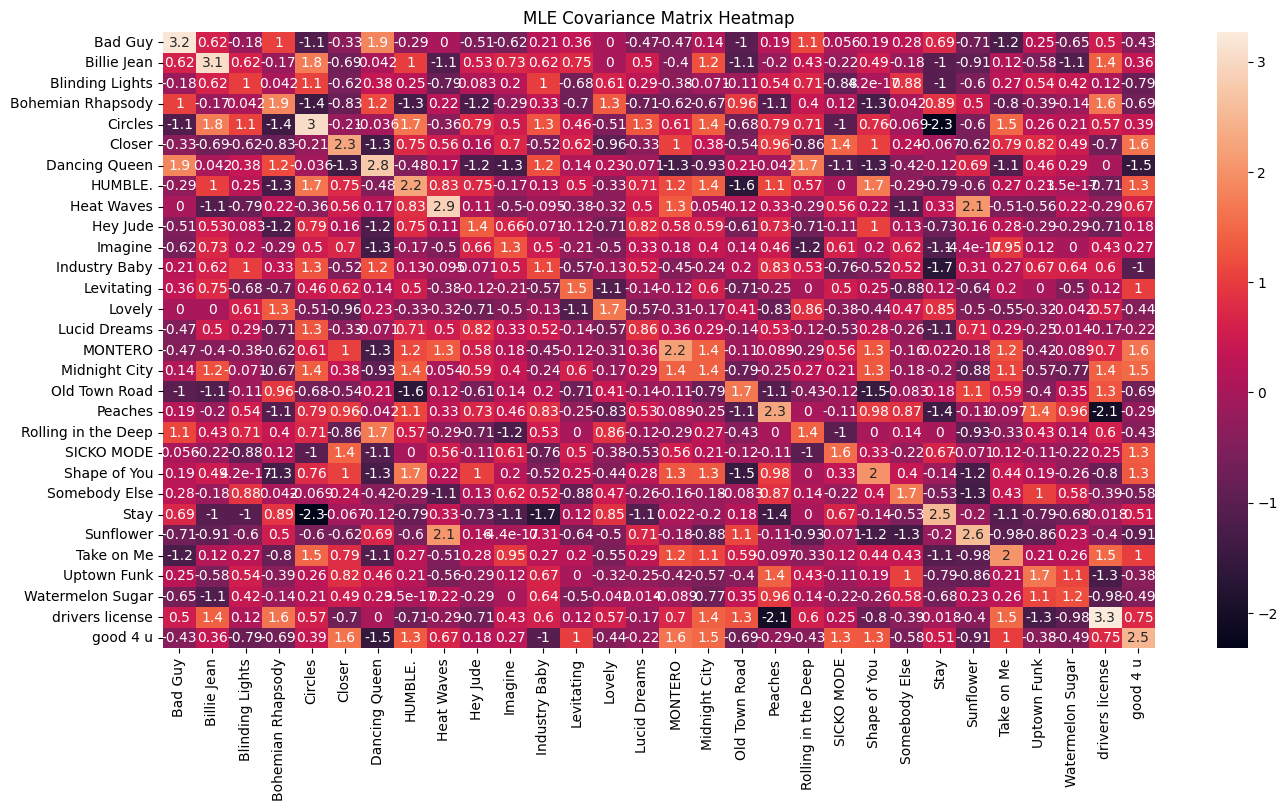

In [ ]:
def mle_covariance_matrix(ratings):
    num_items = ratings.shape[1]
    mle_cov_matrix = np.zeros((num_items, num_items))

    for i in range(num_items):
        for j in range(num_items):
            common_ratings = ratings.iloc[:, [i, j]].dropna()
            if not common_ratings.empty:
                mle_cov_matrix[i, j] = common_ratings.cov().iloc[0, 1]
            else:
                mle_cov_matrix[i, j] = 0

    return pd.DataFrame(mle_cov_matrix, index=ratings.columns, columns=ratings.columns)

mle_cov_matrix = mle_covariance_matrix(rating_matrix.iloc[:, 1:])
plt.figure(figsize=(16, 8))
sns.heatmap(mle_cov_matrix, annot=True)
plt.title('MLE Covariance Matrix Heatmap')
plt.show()

In [ ]:
top_5_peers_mle = {}
top_10_peers_mle = {}
for item in target_items:
    sorted_covariances = mle_cov_matrix[item].sort_values(ascending=False)
    top_5_peers_mle[item] = sorted_covariances.index[1:6].tolist()
    top_10_peers_mle[item] = sorted_covariances.index[1:11].tolist()

print(top_5_peers_mle)
print(top_10_peers_mle)

{'Imagine': ['Take on Me', 'Billie Jean', 'Closer', 'Hey Jude', 'Somebody Else'], 'Industry Baby': ['Dancing Queen', 'Industry Baby', 'Blinding Lights', 'Peaches', 'Uptown Funk']}
{'Imagine': ['Take on Me', 'Billie Jean', 'Closer', 'Hey Jude', 'Somebody Else', 'SICKO MODE', 'Circles', 'Industry Baby', 'Peaches', 'drivers license'], 'Industry Baby': ['Dancing Queen', 'Industry Baby', 'Blinding Lights', 'Peaches', 'Uptown Funk', 'Watermelon Sugar', 'Billie Jean', 'drivers license', 'Rolling in the Deep', 'Somebody Else']}


In [ ]:
reduced_space_top_5_mle = rating_matrix_filled[top_5_peers_mle["Imagine"] + top_5_peers_mle["Industry Baby"]]
print(reduced_space_top_5_mle)

   Take on Me  Billie Jean  Closer  Hey Jude  Somebody Else  Dancing Queen  \
0         5.0            1       5         4              4            1.0   
1         3.0            2       4         3              4            2.0   
2         1.0            1       2         1              1            5.0   
3         2.0            5       1         3              5            5.0   
4         1.0            2       2         4              4            1.0   
5         2.0            5       5         4              2            2.0   
6         NaN            5       2         5              2            1.0   
7         3.0            5       2         3              2            3.0   
8         4.0            4       1         4              2            NaN   
9         1.0            2       2         5              2            4.0   

   Industry Baby  Blinding Lights  Peaches  Uptown Funk  
0       3.000000              3.0        5            5  
1       3.142857         

In [ ]:
predictions_top_5_mle = reduced_space_top_5_mle.mean(axis=1)
print(predictions_top_5_mle)

0    3.600000
1    2.914286
2    2.100000
3    4.100000
4    2.444444
5    3.414286
6    2.777778
7    2.500000
8    2.888889
9    2.914286
dtype: float64


In [ ]:
reduced_space_top_10_mle = rating_matrix_filled[top_10_peers_mle["Imagine"] + top_10_peers_mle["Industry Baby"]]
print(reduced_space_top_10_mle)

   Take on Me  Billie Jean  Closer  Hey Jude  Somebody Else  SICKO MODE  \
0         5.0            1       5         4              4           3   
1         3.0            2       4         3              4           5   
2         1.0            1       2         1              1           3   
3         2.0            5       1         3              5           1   
4         1.0            2       2         4              4           3   
5         2.0            5       5         4              2           5   
6         NaN            5       2         5              2           3   
7         3.0            5       2         3              2           3   
8         4.0            4       1         4              2           2   
9         1.0            2       2         5              2           2   

   Circles  Industry Baby  Peaches  drivers license  Dancing Queen  \
0      5.0       3.000000        5              2.0            1.0   
1      1.0       3.142857        3

In [ ]:
predictions_top_10_mle = reduced_space_top_10_mle.mean(axis=1)
print(predictions_top_10_mle)

0    3.473684
1    3.114286
2    2.277778
3    4.222222
4    2.315789
5    3.364286
6    3.105263
7    2.789474
8    3.157895
9    2.699248
dtype: float64


In [ ]:
comparison_top_10_vs_top_5_mle = predictions_top_10_mle - predictions_top_5_mle
print(comparison_top_10_vs_top_5_mle)

0   -0.126316
1    0.200000
2    0.177778
3    0.122222
4   -0.128655
5   -0.050000
6    0.327485
7    0.289474
8    0.269006
9   -0.215038
dtype: float64


In [ ]:
comparison_top_5_vs_top_5_mle = predictions_top_5 - predictions_top_5_mle
print(comparison_top_5_vs_top_5_mle)

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
5    0.0
6    0.0
7    0.0
8    0.0
9    0.0
dtype: float64


In [ ]:
comparison_top_10_vs_top_10_mle = predictions_top_10 - predictions_top_10_mle
print(comparison_top_10_vs_top_10_mle)

0    0.105263
1   -0.100000
2    0.038012
3   -0.011696
4    0.105263
5    0.071805
6    0.052632
7   -0.105263
8    0.000000
9    0.210526
dtype: float64
